# Oracle Cloud Infrastructure Python SDK

Eine Library um mit der Oracle Cloud zu interagieren und demnach auch mit dem Object Storage. Dieser Ansatz ist auch als Skriptsprache, Java etc. möglich.

Weitere Informationen unter: https://github.com/oracle/oci-python-sdk

In [6]:
import oci
import io
from io import StringIO
import pandas as pd
from PIL import Image

Die SDK benötigt eine Konfigurationsdatei, um sich mit der Cloud Umgebung verbinden zu können. 
 
Es benötigt: 

* ID of user and tenancy
* Region
* Fingerpring and path of the private key (API key)
* Region

In [10]:
config = oci.config.from_file("/home/oracle/.oci/config", "DEFAULT")
print(config)

ConfigFileNotFound: Could not find config file at /home/oracle/.oci/config

Sind wir im richtigen Kompartment und Tenancy (Namespace)?

Zudem erstellen wir ein Object Storage Objekt, welches als Schnittstelle zum Object Storage dient. 

In [7]:
compartment_id = config["tenancy"]
#print(compartment_id)
object_storage = oci.object_storage.ObjectStorageClient(config)
print(object_storage)
namespace = object_storage.get_namespace().data
#print(namespace)

Der Object Storage hat eine Bucket Strukture. Wir müssen demnach den Bucket-Namen angeben. 

In [10]:
bucket_name = "seminar"
bucket = object_storage.get_bucket(namespace, bucket_name)

Auflisten der Dateien in dem angegebenen Bucket. 

In [11]:
object_list = object_storage.list_objects(namespace, bucket_name)
for o in object_list.data.objects:
    print(o.name)

boston_house_prices.csv
trousers_1.jpg


# CSV

Lass uns zunächst ein CSV File aus dem Object Storage laden. 

In [22]:
#object_name = "bag01.jpg"
object_name = "boston_house_prices.csv"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

Das CSV lieft zunächst in Byte Format vor. 

In [23]:
print(type(chunktest))
chunktest[0:200]

<class 'bytes'>


b'"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,2'

Mit IO Strings können wir die Daten mit Pandas einlesen. 

In [24]:
s=str(chunktest,'utf-8')
data = StringIO(s)
print(type(data))
contents = data.getvalue()
contents[0:200]

<class '_io.StringIO'>


'"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,2'

In [25]:
df=pd.read_csv(data)

In [26]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## Bilder

Nun ein Bildbeispiel. Wir müssen hier mit ByteIO arbeiten, um das Bild zu öffnen und einzulesen.

In [27]:
object_name = "trousers_1.jpg"
#object_name = "newtest.txt"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

In [30]:
imageStream = io.BytesIO(chunktest)
imageFile = Image.open(imageStream)
print(type(imageFile))
print(imageFile.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(202, 250)


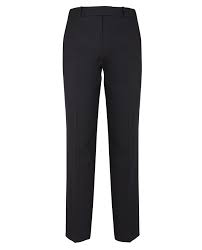

In [31]:
imageFile